In [42]:
from datetime import datetime, timedelta, time, date
from events import Events
import pandas as pd

events = Events()

df = pd.DataFrame(events.events,columns=["week", "category", "subject", "start", "end", "duration"])
df = df.loc[df.week != "Before"]
df['duration_mins'] = df.duration.apply(lambda t: t.seconds//60)
df['duration_hours'] = df.duration.apply(lambda t: t.seconds/3600)

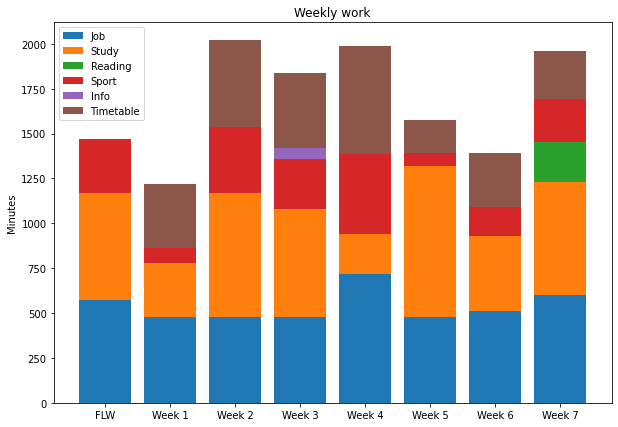

In [43]:
######
# WEEKLY BAR CHART
######

import numpy as np
import matplotlib.pyplot as plt
 
N = len(df.week.unique())
 
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
labels = []
bottom = np.zeros(N)
categories = df.loc[df.category != "Social"].category.unique()

totals = df \
    .loc[df.week != "Before"] \
    .loc[df.category != "Social"] \
    .groupby(['category','week'])["duration_mins"].sum().unstack(fill_value=0).stack()

for c in categories:
    p = plt.bar(ind, totals[c], bottom = bottom, label=c)
    bottom += totals[c]
    labels.append([p[0],c])
 
plt.ylabel('Minutes')
plt.title('Weekly work')
plt.xticks(ind, totals['Study'].keys())

plt.legend()
plt.show()

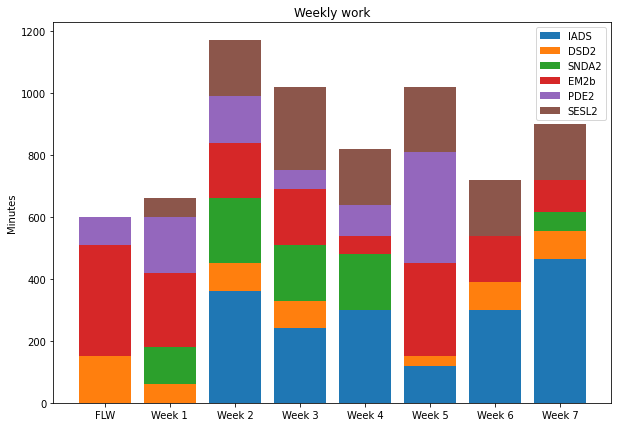

In [44]:
######
# Time per Subject per Week
######

import numpy as np
import matplotlib.pyplot as plt

N = len(df.week.unique())
 
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
labels = []
bottom = np.zeros(N)

totals = df.loc[df.subject.notna()].groupby(['subject','week'])["duration_mins"].sum().unstack(fill_value=0).stack()
subjects = df.loc[df.subject.notna()].subject.unique()
for s in subjects:
    p = plt.bar(ind, totals[s], bottom = bottom, label=s)
    bottom += totals[s]
    labels.append([p[0],s])
 
plt.ylabel('Minutes')
plt.title('Weekly work')
plt.xticks(ind, totals['DSD2'].keys())

plt.legend()
plt.show()


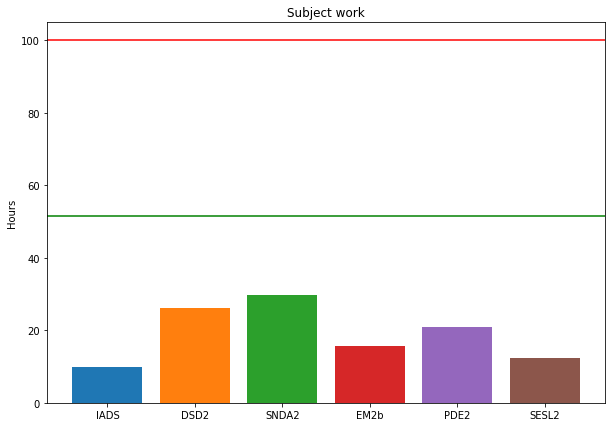

In [45]:
######
# Time per Subject
######

import numpy as np
import matplotlib.pyplot as plt

subjects = df.loc[df.subject.notna()].subject.unique()
N = len(subjects)
 
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
labels = []
bottom = np.zeros(N)

totals = df.loc[df.subject.notna()].groupby(['subject'])["duration_hours"].sum()

p = plt.bar(ind, totals, color=plt.get_cmap("tab10")(range(N)))
 
plt.ylabel('Hours')
plt.title('Subject work')
plt.xticks(ind, subjects)

plt.axhline(100, color='red')
today = datetime.now().timetuple().tm_yday
exam_date = datetime(2022,5,1).timetuple().tm_yday
start_date = datetime(2022,1,16).timetuple().tm_yday 
way_through_sem = (today-start_date)/(exam_date-start_date)
plt.axhline(100*way_through_sem, color='green')
# plt.legend()
plt.show()


In [46]:
# datetime(2022,3,9,8,45,0).time()>time(9)
def get_start(s):
    if s['start'].weekday() > 4:
        s['contributing_time'] = timedelta(0)
        return s
    if s['start'].time() >= time(9): 
        start = s['start'].time()
    elif s['end'].time() > time(9):
        start = time(9)
    else:
        s['contributing_time'] = timedelta(0)
        return s

    if s['end'].time() <= time(17): 
        end = s['end'].time()
    elif s['start'].time() < time(17):
        end = time(17)
    else:
        s['contributing_time'] = timedelta(0)
        return s

    s['contributing_time'] = datetime.combine(date.min,end) - datetime.combine(date.min,start)
    return s

working_df = df.apply(get_start, axis=1)
working_df['contributing_hours'] = working_df['contributing_time'].apply(lambda x: x.seconds/3600)
working_df.head()

,week,category,subject,start,end,duration,duration_mins,duration_hours,contributing_time,contributing_hours
0,Week 3,Job,None,2022-02-02 09:30:00,2022-02-02 17:30:00,0 days 08:00:00,480,8.0,0 days 07:30:00,7.5
1,Week 2,Job,None,2022-01-26 09:30:00,2022-01-26 17:30:00,0 days 08:00:00,480,8.0,0 days 07:30:00,7.5
2,Week 1,Job,None,2022-01-21 09:30:00,2022-01-21 17:30:00,0 days 08:00:00,480,8.0,0 days 07:30:00,7.5
3,Week 7,Social,None,2022-03-10 18:30:00,2022-03-10 20:30:00,0 days 02:00:00,120,2.0,0 days 00:00:00,0.0
4,Week 7,Study,IADS,2022-03-10 13:30:00,2022-03-10 17:00:00,0 days 03:30:00,210,3.5,0 days 03:30:00,3.5


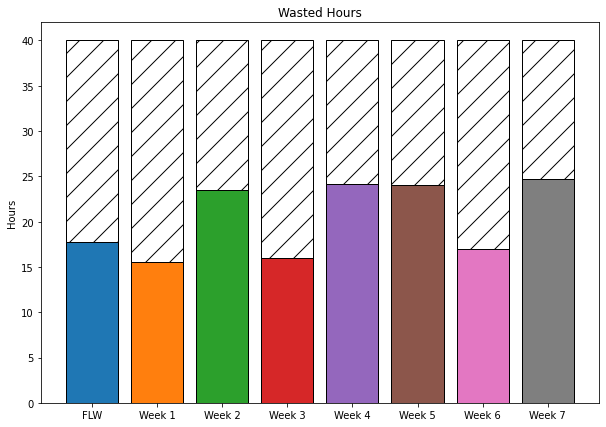

In [54]:
######
# Unused time per Week (9 to 5 working times)
######

import numpy as np
import matplotlib.pyplot as plt

N = len(df.week.unique())
 
ind = np.arange(N)  
width = 0.35 

fig = plt.subplots(figsize =(10, 7))
bottom = np.zeros(N)

totals = working_df.groupby(['week'])["contributing_hours"].sum()
p = plt.bar(ind, totals, color=plt.get_cmap("tab10")(range(N)),edgecolor='black')
plt.bar(ind, [40]*N-totals, bottom=totals, fill=False, hatch='/')

 
plt.ylabel('Hours')
plt.title('Wasted Hours')
plt.xticks(ind, totals.keys())

# plt.legend()
plt.show()